In [2]:
from ema_workbench import load_results
from SALib.analyze import sobol
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Original seed analysis

In [12]:
# load results of base case
base_case_results = load_results('../data/output/EMA/seedAnalysisBaseCase.tar.gz')
base_case_outcomes = pd.DataFrame(base_case_results[1])

In [3]:
# load results of bad case
bad_case_results = load_results('../data/output/EMA/seedAnalysisBadCase.tar.gz')
bad_case_outcomes = pd.DataFrame(bad_case_results[1])

In [4]:
def plot_convergence(outcomes, sample, title):
    # create plot axis
    fig, axs = plt.subplots(3, 2, figsize=(20,10))

    # make copy of results
    con = outcomes.copy().head(sample)

    # calculate mean per sample size for all outcomes
    for index, row in con.iterrows():
        con.loc[index, 'averageMeanSpeed'] = con.loc[:index, 'meanSpeed'].mean()
        con.loc[index, 'stdMeanSpeed'] = con.loc[:index, 'meanSpeed'].std()
        con.loc[index, 'averageMeanDensityArea1'] = con.loc[:index, 'meanDensityArea1'].mean()
        con.loc[index, 'stdMeanDensityArea1'] = con.loc[:index, 'meanDensityArea1'].std()
        con.loc[index, 'averageMaxDensityArea1'] = con.loc[:index, 'maxDensityArea1'].mean()
        con.loc[index, 'stdMaxDensityArea1'] = con.loc[:index, 'maxDensityArea1'].std()

    con.reset_index(inplace=True)

    # plot all
    sns.lineplot(
        ax=axs[0][0],
        data=con,
        x=con.index,
        y='averageMeanSpeed'
    )
    axs[0][0].set(xlabel='sample size (iterations)', ylabel='average of \n mean speed values (m/s)')
    sns.lineplot(
        ax=axs[0][1],
        data=con,
        x=con.index,
        y='stdMeanSpeed'
    )
    axs[0][1].set(xlabel='sample size (iterations)', ylabel='std of \n mean speed values (m/s)')
    sns.lineplot(
        ax=axs[1][0],
        data=con,
        x=con.index,
        y='averageMeanDensityArea1'
    )
    axs[1][0].set(xlabel='sample size (iterations)', ylabel='average of \n mean density values (#/m²)')
    sns.lineplot(
        ax=axs[1][1],
        data=con,
        x=con.index,
        y='stdMeanDensityArea1'
    )
    axs[1][1].set(xlabel='sample size (iterations)', ylabel='std of \n mean density values (#/m²)')
    sns.lineplot(
        ax=axs[2][0],
        data=con,
        x=con.index,
        y='averageMaxDensityArea1'
    )
    axs[2][0].set(xlabel='sample size (iterations)', ylabel='average of \n max density values (#/m²)')
    sns.lineplot(
        ax=axs[2][1],
        data=con,
        x=con.index,
        y='stdMaxDensityArea1'
    )
    axs[2][1].set(xlabel='sample size (iterations)', ylabel='std of \n max density values (#/m²)')

    plt.suptitle(title, fontsize=20)
    plt.show()

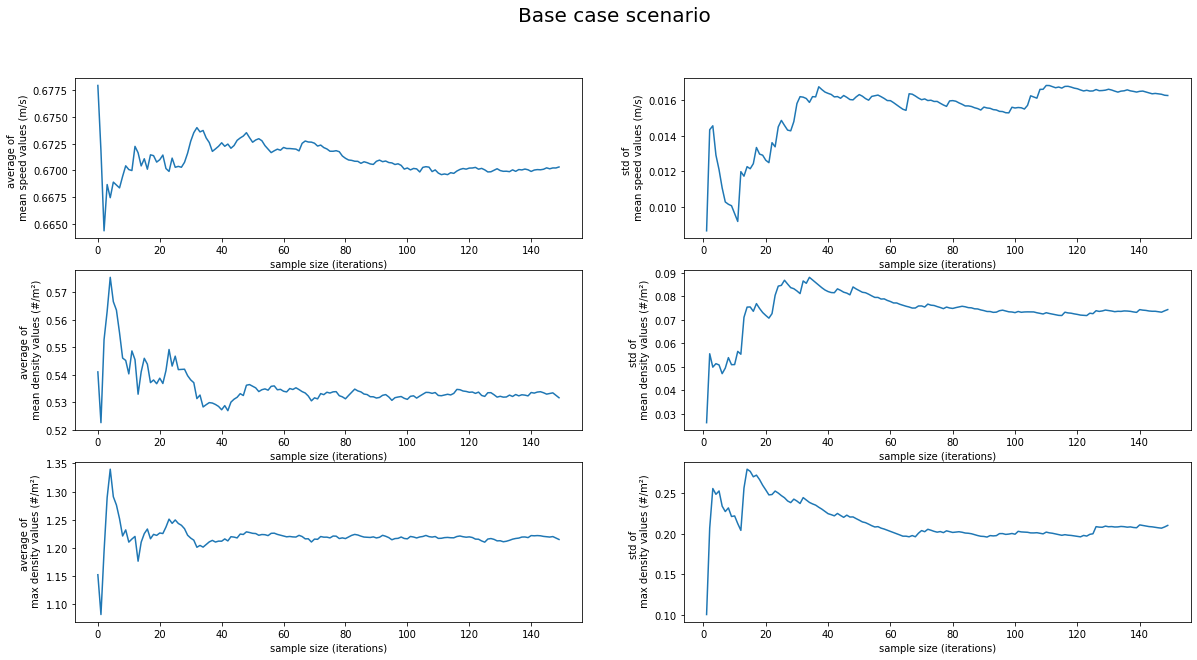

In [5]:
plot_convergence(base_case_outcomes, 150, 'Base case scenario')

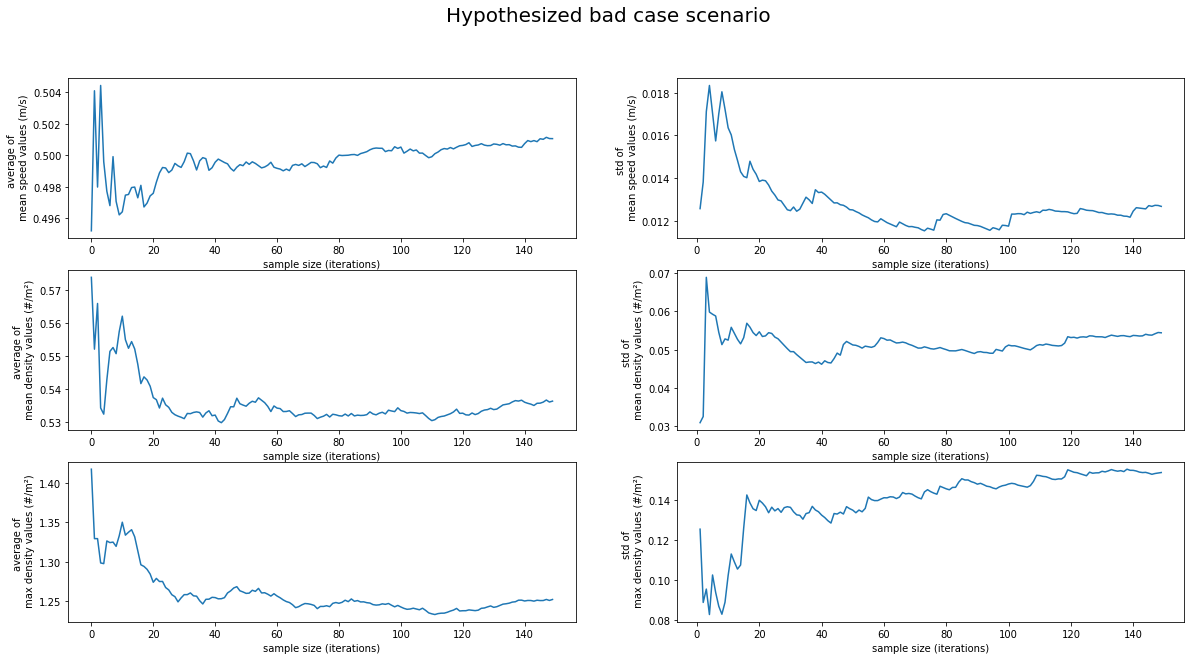

In [6]:
plot_convergence(bad_case_outcomes, 150, 'Hypothesized bad case scenario')

# Additional seed analysis
Check 4 runs with 60 replications for both cases

In [3]:
# load results of base case
add_base_case_results = load_results('../data/output/EMA/seedAnalysisAdditionalBaseCase.tar.gz')
add_base_case_outcomes = pd.DataFrame(add_base_case_results[1])

<frozen importlib._bootstrap>:914: ImportWarning: ShimImporter.find_spec() not found; falling back to find_module()


In [4]:
# load results of bad case
add_bad_case_results = load_results('../data/output/EMA/seedAnalysisAdditionalBadCase.tar.gz')
add_bad_case_outcomes = pd.DataFrame(add_bad_case_results[1])

In [35]:
add_base_case_outcomes.describe()

,AverageMeanSpeed,StdMeanSpeed,AverageMeanDensityArea1,stdMeanDensityArea1,MeanMaxDensityArea1,stdMaxDensityArea1
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.673988,0.015561,0.535238,0.069639,1.230542,0.198142
std,0.002949,0.000125,0.006279,0.006807,0.014331,0.008175
min,0.669745,0.015401,0.527999,0.059957,1.214887,0.190506
25%,0.673114,0.015504,0.531999,0.068385,1.220204,0.192787
50%,0.675025,0.015574,0.534974,0.071340,1.231576,0.196497
75%,0.675898,0.015631,0.538213,0.072594,1.241914,0.201852
max,0.676158,0.015695,0.543006,0.075919,1.244129,0.209067


In [36]:
add_bad_case_outcomes.describe()

,AverageMeanSpeed,StdMeanSpeed,AverageMeanDensityArea1,stdMeanDensityArea1,MeanMaxDensityArea1,stdMaxDensityArea1
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.500193,0.012435,0.542298,0.050858,1.262517,0.142953
std,0.001235,0.000912,0.003024,0.001973,0.003831,0.011971
min,0.498787,0.011388,0.539436,0.048241,1.258307,0.128168
25%,0.499535,0.011849,0.540043,0.050028,1.260523,0.136163
50%,0.500129,0.012469,0.541892,0.051156,1.262147,0.144224
75%,0.500786,0.013055,0.544147,0.051986,1.264141,0.151014
max,0.501728,0.013415,0.545970,0.052879,1.267464,0.155195
